In [2]:
import pandas as pd

In [8]:
raw = pd.read_csv('https://raw.githubusercontent.com/mattharrison/datasets/master/data/alta-noaa-1980-2019.csv',parse_dates=['DATE'])
raw.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
DASF                float64
MDPR                float64
MDSF                float64
PRCP                float64
SNOW                float64
SNWD                float64
TMAX                float64
TMIN                float64
TOBS                float64
WT01                float64
WT03                float64
WT04                float64
WT05                float64
WT06                float64
WT11                float64
dtype: object

In [63]:
def tweak_alta(df):
    cols = ['STATION','NAME','LATITUDE','LONGITUDE','ELEVATION','DATE','PRCP','SNOW','SNWD','TMAX','TMIN','TOBS']
    
    return (
    df
    [cols]
    .groupby(pd.Grouper(key='DATE', freq='W'))
    .agg({'PRCP':'sum', 'TMAX':'max', 'TMIN':'min', 'SNOW':'sum', 'SNWD':'mean'})
    .reset_index()
    .assign(LOCATION='Alta',
            SEASON='Ski')
    .assign(LOCATION=lambda df_: df_.LOCATION.where(
                                                    df_.DATE.dt.year >= 2000, 
                                                    'Alta Ski Resort'),  #.where keeps the original value where the condition is met.
            T_RANGE=lambda df_: df_.TMAX - df_.TMIN,
            SEASON=lambda df_: df_
                                .SEASON
                                .where(
               (df_.DATE.dt.month <= 4) | (df_.DATE.dt.month >= 11), 'Summer')
                                .add(' ')
                                .add(df_
                                    .DATE.dt.year.astype(str)
                                    .where(df_.DATE.dt.month > 4,
                                          (df_.DATE.dt.year - 1).astype(str)))
           )
    )

In [65]:
alta = tweak_alta(raw)
alta

,DATE,PRCP,TMAX,TMIN,SNOW,SNWD,LOCATION,SEASON,T_RANGE
0,1980-01-06,0.68,42.0,12.0,7.0,30.500000,Alta Ski Resort,Ski 1979,30.0
1,1980-01-13,8.76,33.0,-5.0,63.0,48.142857,Alta Ski Resort,Ski 1979,38.0
2,1980-01-20,4.68,40.0,15.0,34.0,63.285714,Alta Ski Resort,Ski 1979,25.0
3,1980-01-27,0.00,43.0,10.0,0.0,57.000000,Alta Ski Resort,Ski 1979,33.0
4,1980-02-03,2.58,38.0,-6.0,40.0,70.571429,Alta Ski Resort,Ski 1979,44.0
...,...,...,...,...,...,...,...,...,...
2066,2019-08-11,1.09,78.0,42.0,0.0,0.000000,Alta,Summer 2019,36.0
2067,2019-08-18,0.00,75.0,42.0,0.0,0.000000,Alta,Summer 2019,33.0
2068,2019-08-25,0.00,76.0,45.0,0.0,0.000000,Alta,Summer 2019,31.0
2069,2019-09-01,0.02,78.0,41.0,0.0,0.000000,Alta,Summer 2019,37.0


In [68]:
def tweak_alta(df):
    
    def get_location(df_):
        return (df_
                .assign(LOCATION='Alta')
                .LOCATION.where(   #.where keeps the original value where the condition is met.
                    df_.DATE.dt.year >= 2000,'Alta Ski Resort')
               ) 
    
    def get_season(df_):
        return (df_
                .assign(SEASON='Ski')
                .SEASON
                .where((df_.DATE.dt.month <= 4) | (df_.DATE.dt.month >= 11), 'Summer')
                .add(' ')
                .add(df_
                     .DATE.dt.year.astype(str)
                     .where(df_.DATE.dt.month > 4,
                            (df_.DATE.dt.year - 1).astype(str)))
               )
                
                
                
    cols = ['STATION','NAME','LATITUDE','LONGITUDE','ELEVATION','DATE','PRCP','SNOW','SNWD','TMAX','TMIN','TOBS']
    
    return (df
            [cols]
            .groupby(pd.Grouper(key='DATE', freq='W'))
            .agg({'PRCP':'sum', 'TMAX':'max', 'TMIN':'min', 'SNOW':'sum', 'SNWD':'mean'})
            .reset_index()
            .assign(LOCATION=get_location,
                    T_RANGE=lambda df_: df_.TMAX - df_.TMIN,
                    SEASON=get_season
                   )
    )

In [69]:
alta = tweak_alta(raw)
alta

,DATE,PRCP,TMAX,TMIN,SNOW,SNWD,LOCATION,T_RANGE,SEASON
0,1980-01-06,0.68,42.0,12.0,7.0,30.500000,Alta Ski Resort,30.0,Ski 1979
1,1980-01-13,8.76,33.0,-5.0,63.0,48.142857,Alta Ski Resort,38.0,Ski 1979
2,1980-01-20,4.68,40.0,15.0,34.0,63.285714,Alta Ski Resort,25.0,Ski 1979
3,1980-01-27,0.00,43.0,10.0,0.0,57.000000,Alta Ski Resort,33.0,Ski 1979
4,1980-02-03,2.58,38.0,-6.0,40.0,70.571429,Alta Ski Resort,44.0,Ski 1979
...,...,...,...,...,...,...,...,...,...
2066,2019-08-11,1.09,78.0,42.0,0.0,0.000000,Alta,36.0,Summer 2019
2067,2019-08-18,0.00,75.0,42.0,0.0,0.000000,Alta,33.0,Summer 2019
2068,2019-08-25,0.00,76.0,45.0,0.0,0.000000,Alta,31.0,Summer 2019
2069,2019-09-01,0.02,78.0,41.0,0.0,0.000000,Alta,37.0,Summer 2019


In [70]:
import matplotlib.pyplot as plt

In [100]:
def plot_season(df,year,fig,ax):
    blue = '#99ddee'
    white = '#fff'
    data = (df
           .query(f'SEASON=="Ski {year}"')
           )
    for side in 'top,right,bottom,left'.split(','):
        ax.spines[side].set_visible(False)
    ax.tick_params(axis='both',colors=white)
    ax.tick_params(axis='x',which='minor',colors=white)
    ax.fill_between(data.DATE, data.SNWD, color='white')
    ax.set_facecolor(blue)
    ax.set_title(f'{year} Season Snowfall', fontsize=16, color=white)
    ax.set_ylim(0,150)

    
def facet_plot(df,years):
    blue = '#99ddee'
    white = '#fff'
    fig,axs = plt.subplots(ncols=2, nrows = ( len(years)//2), figsize=(16,10), facecolor=blue )
    axs = axs.flatten()
    for i, year in enumerate(years):
        plot_season(df,year,fig,axs[i])
    fig.suptitle('Alta Snowfall',fontsize=20,color=white)
    fig.tight_layout()
    return fig

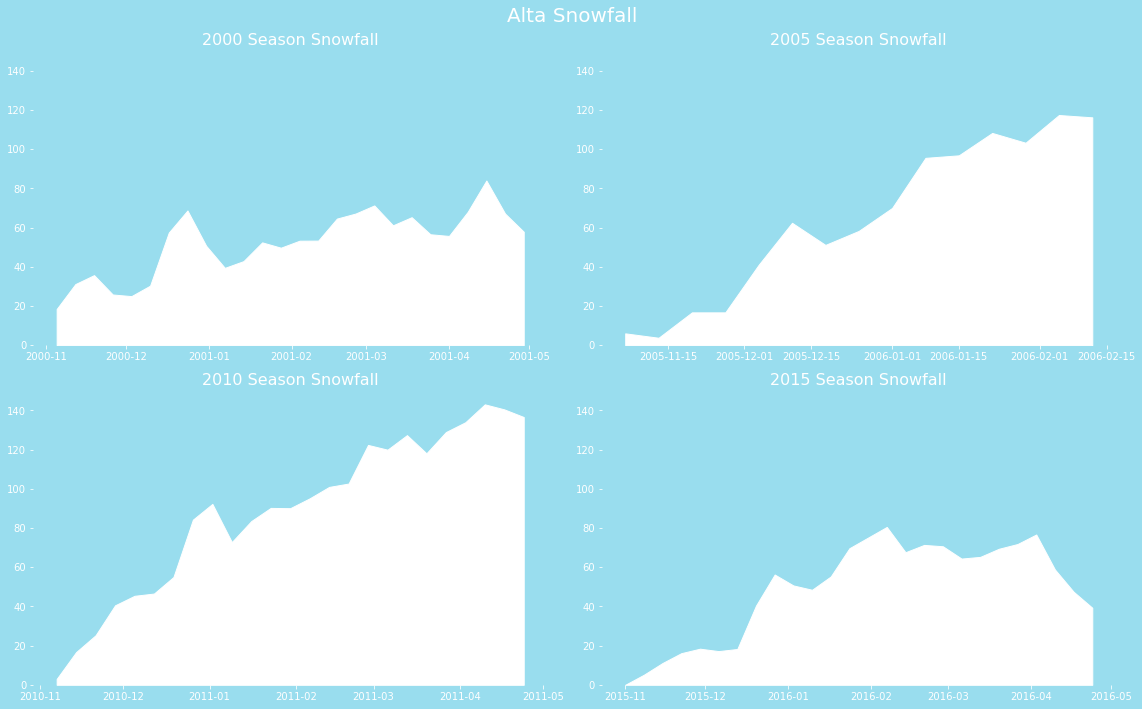

In [102]:

_ = tweak_alta(raw).pipe(facet_plot, years=['2000','2005','2010','2015'])